In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "Resources/alldata.csv"
all_df = pd.read_csv(filepath)
all_df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
all_df['reviews'] = all_df['reviews'].fillna(value=0)
all_df = all_df.dropna()
all_df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
for i in range(len(all_df)):
    if all_df.iloc[i,4][-1] == ' ':
        all_df.iloc[i,4] = all_df.iloc[i,4][:-1]

In [5]:
city_list = []
zip_list = []
for i in range(len(all_df)):
    if "0" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "1" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "2" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "3" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "4" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "5" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "6" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "7" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "8" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    elif "9" in all_df.iloc[i,4]:
        zip_list.append(all_df.iloc[i,4][-5:])
        city_list.append(all_df.iloc[i,4][:-6])
    else:
        zip_list.append("None")
        city_list.append(all_df.iloc[i,4])



In [6]:
all_df['Zipcode'] = pd.Series(zip_list)
all_df['location'] = pd.Series(city_list)

In [7]:
company_dict = {}
for i in range(len(all_df)):
    company = all_df.iloc[i, 1]
    if company not in company_dict:
        company_dict[company] = {'positions': 1, 'reviews': all_df.iloc[i, 3]}
    else:
        company_dict[company]['positions'] += 1

In [8]:
job_dict = {}
for i in range(len(all_df)):
    job = all_df.iloc[i, 0]
    if job not in job_dict:
        job_dict[job] = 1
    else:
        job_dict[job] += 1

In [9]:
company_list = list(company_dict.keys())
positions_list = []
reviews_list = []

for i in company_list:
    reviews_list.append(company_dict[i]['reviews'])
    positions_list.append(company_dict[i]['positions'])


In [10]:
company_df = pd.DataFrame({'Company':company_list, 'Positions': positions_list, 'Reviews': reviews_list})
#company_df.head(15)
#company_df.reset_index()
company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions").reset_index()




,index,Company,Positions,Reviews
0,50,Amazon.com,358,25907.0
1,235,Ball Aerospace,187,108.0
2,847,Microsoft,137,4618.0
3,162,Google,134,2474.0
4,1158,NYU Langone Health,77,705.0
5,1720,Fred Hutchinson Cancer Research Center,70,91.0
6,8,KPMG,66,4494.0
7,966,Lab126,50,0.0
8,468,Facebook,49,366.0
9,968,Broad Institute,49,32.0


In [11]:
company_df['Positions'].value_counts().head()

1    1330
2     372
3     168
4      82
5      56
Name: Positions, dtype: int64

In [12]:
location_dict = {}
for i in range(len(all_df)):
    location = all_df.iloc[i,4]
    if location in location_dict:
        location_dict[location] += 1
    else:
        location_dict[location] = 1

In [13]:
location_list = list(location_dict.keys())
location_counts = []
for i in location_list:
    location_counts.append(location_dict[i])

In [14]:
all_df['location'] = all_df['location'].fillna(value = 'No Location')
all_df['Zipcode'] = all_df['Zipcode'].fillna(value = 'None')
all_df.tail()

,position,company,description,reviews,location,Zipcode
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,No Location,None
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,No Location,None
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,No Location,None
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,No Location,None
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,No Location,None


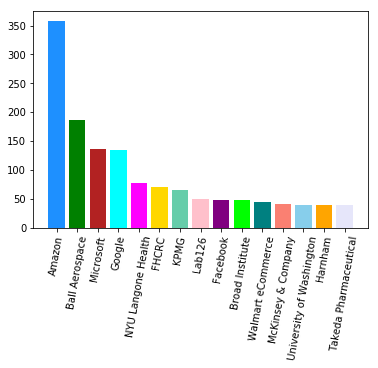

<Figure size 432x288 with 0 Axes>

In [15]:
#Create plot for company/position count 

company_x=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Company"]
company_y=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Positions"]
labels = ["Amazon", "Ball Aerospace", "Microsoft", "Google", "NYU Langone Health", "FHCRC", "KPMG", 
          "Lab126", "Facebook", "Broad Institute", "Walmart eCommerce", "McKinsey & Company", "University of Washington", 
          "Harnham", "Takeda Pharmaceutical"]

colors =["dodgerblue", "green", "firebrick", "cyan", "magenta", "gold", "mediumaquamarine", "pink", "purple", "lime", "teal", "salmon", "skyblue", "orange", "lavender"]

company_df=plt.bar(labels, company_y, color=colors, label=labels)
plt.xticks(rotation=80)

plt.show()
plt.savefig("Images/Cloudinessvs.Latitude.png")